In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.cm as cm
import scipy.spatial
import os 

In [27]:
# import data 
# downloaded from https://mesonet.agron.iastate.edu/request/download.phtml?network=MD_ASOS
# Feb 5, 3:45 pm 
# for python interface, see https://github.com/akrherz/iem/blob/master/scripts/asos/iem_scraper_example.py
date_parser = pd.core.tools.datetimes.to_datetime # pd.datetools.to_datetime
asos = pd.read_csv('data/mdASOS_summer_2016.csv', parse_dates = ['valid'], date_parser = date_parser).set_index('valid')
asos.columns = ['station', 't_f', 't_c', 'dew_f', 'dew_c']
for column in ['t_f', 't_c', 'dew_f', 'dew_c']: 
    asos[column] = pd.to_numeric(asos[column],errors='coerce')

In [61]:
bwi = asos[asos['station'] =='BWI']['t_c'].resample('H').mean()
sci_center = asos[asos['station']=='DMH']['t_c'].resample('H').mean()
#westminster = asos[asos['station']=='DMW']['t_c'].resample('H').mean()
camp_david = asos[asos['station']=='RSP']['t_c'].resample('H').mean()

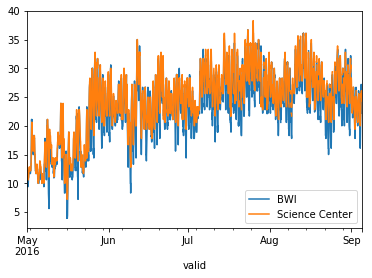

In [69]:
bwi.plot()
sci_center.plot()
#camp_david.plot()
plt.legend(['BWI', 'Science Center', 'Camp David'])

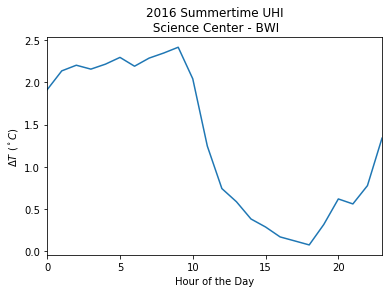

In [73]:
(sci_center-bwi).groupby(bwi.index.hour).mean().plot()
plt.xlabel('Hour of the Day')
plt.ylabel('$\Delta T$ ($^\circ C$)')
plt.title('2016 Summertime UHI\n Science Center - BWI')
plt.savefig('plots/asosUHIsummer2016.png')